## Topological network

In this part, you will evaluate the resilience of the London’s underground through the removal of stations that can potentially make the underground vulnerable. Through the procedure outlined below you will investigate which are the stations that are most critical for the functioning of the underground, and which methodology is more appropriate to finding these stations.

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
G = nx.read_graphml('dataset/london.graph.xml')
print(nx.info(G))
G_nodes = list(G.nodes)
print(G_nodes[:10])

Graph with 401 nodes and 467 edges
['Wembley Park', 'Kingsbury', 'Queensbury', 'Canons Park', 'Stanmore', 'Stratford', 'West Ham', 'Canning Town', 'North Greenwich', 'Canary Wharf']


In [3]:
# convert the string coords into tuples
print(type(G.nodes[G_nodes[1]]['coords']))
for node in G.nodes():
    G.nodes[node]['coords'] = eval(G.nodes[node]['coords'])
print(G.nodes[G_nodes[1]]['coords'])
print(type(G.nodes[G_nodes[1]]['coords']))

<class 'str'>
(519359.9688603217, 188721.22027255083)
<class 'tuple'>


In [4]:
print(list(G.nodes(data=True))[0])
print(list(G.edges(data=True))[0])

('Wembley Park', {'coords': (519316.5590174915, 186389.32981656672)})
('Wembley Park', 'Kingsbury', {'length': 2916.7715580506483, 'line_name': 'Jubilee', 'flows': 12356})


In [5]:
# construct the graph
df = nx.to_pandas_edgelist(G)
df.head()

,source,target,flows,line_name,length
0,Wembley Park,Kingsbury,12356,Jubilee,2916.771558
1,Wembley Park,Neasden,6744,Jubilee,2353.165938
2,Wembley Park,Preston Road,36601,Metropolitan,1419.735166
3,Wembley Park,Finchley Road,55216,Metropolitan,7266.373927
4,Kingsbury,Queensbury,9419,Jubilee,1245.995234


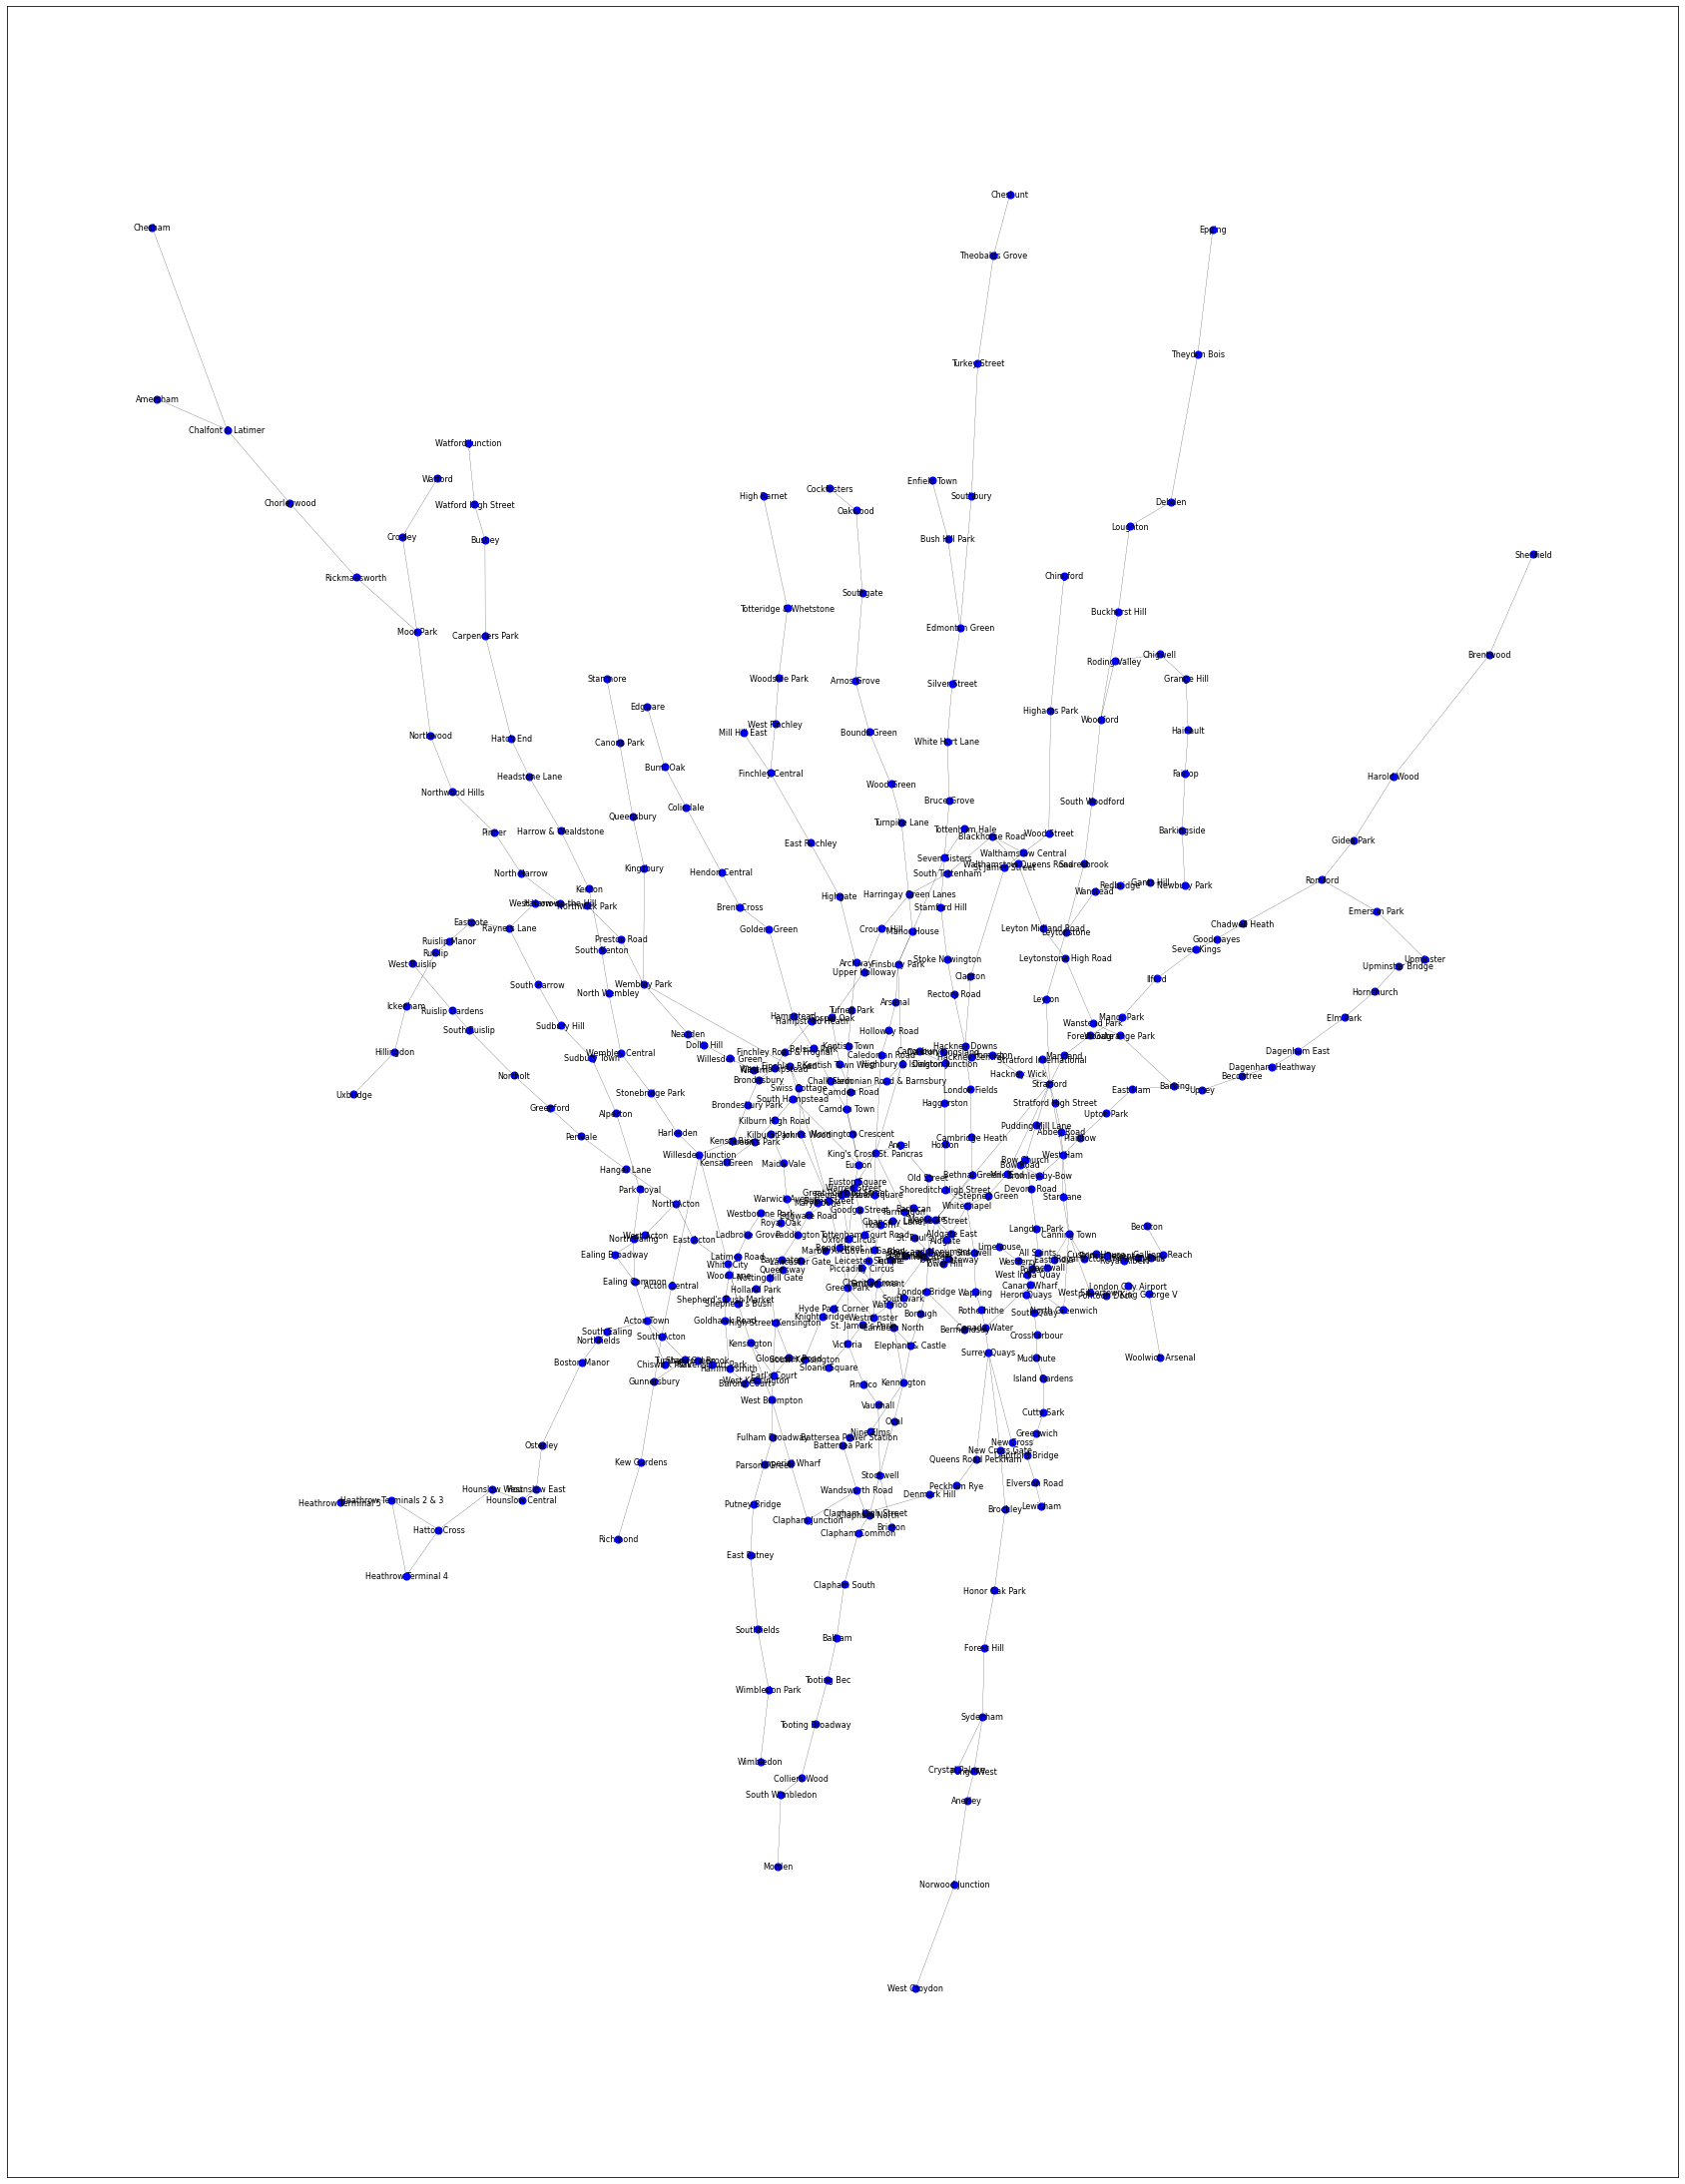

In [6]:
# draw the underground graph
fig, ax = plt.subplots(figsize=(30,40))
pos = nx.get_node_attributes(G, 'coords')
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='b')
nx.draw_networkx_edges(G, pos, arrows=False, width=0.2)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.show()

## Centrality measures

Select 3 centrality measures to characterise nodes, aiming at identifying the most important nodes in this particular network. In addition to giving their definitions, explain 
1. what do the measures mean into the context of the underground
2. why they will allow you to find the stations that are most crucial for the functioning of the underground
3. compute the measures for your nodes in the network

Give the results in a table for the first 10 ranked nodes for each of the 3 measures. (9 marks, 3 per measure)

### Degree Centrality

Degree centrality is defined as the number of links incident upon a node (i.e., the number of ties that a node has). Since the London Underground network is a directed (meaning that ties have direction), then two separate measures of degree centrality are defined, namely, indegree and outdegree. [Indegree is a count of the number of ties directed to the node (head endpoints) and outdegree is the number of ties that the node directs to others (tail endpoints). In such cases, the degree is the sum of indegree and outdegree.](https://link.springer.com/referenceworkentry/10.1007/978-1-4419-9863-7_935#citeas)

In NetworkX, we can easily calculate the degree centrality by using function `nx.degree_centrality`:

In [7]:
centrality = pd.DataFrame()
centrality["node"] = G_nodes
centrality["degree_centrality"] = nx.degree_centrality(G).values()
degree_centrality_head_10 = centrality.sort_values(["degree_centrality"], ascending=False)
degree_centrality_head_10.reset_index(inplace=True, drop=True)
degree_centrality_head_10.head(10)

,node,degree_centrality
0,Stratford,0.0225
1,Bank and Monument,0.0200
2,King's Cross St. Pancras,0.0175
3,Baker Street,0.0175
4,Earl's Court,0.0150
5,Oxford Circus,0.0150
6,Liverpool Street,0.0150
7,Waterloo,0.0150
8,Green Park,0.0150
9,Canning Town,0.0150


### Betweenness Centrality

Betweenness centrality is a way of detecting the amount of influence a node has over the flow of information in a graph. It is often used to find nodes that serve as a bridge from one part of a graph to another. The algorithm calculates unweighted shortest paths between all pairs of nodes in a graph. We can use the `nx.betweenness_centrality` to calculate it.

In [8]:
# centrality["betweenness_centrality"] = nx.betweenness_centrality(G, weight='length',normalized=False).values()
centrality["betweenness_centrality"] = nx.betweenness_centrality(G).values()
betweenness_centrality_head_10 = centrality.sort_values(["betweenness_centrality"], ascending=False)
betweenness_centrality_head_10.reset_index(inplace=True, drop=True)
betweenness_centrality_head_10.head(10)

,node,degree_centrality,betweenness_centrality
0,Stratford,0.0225,0.297846
1,Bank and Monument,0.0200,0.290489
2,Liverpool Street,0.0150,0.270807
3,King's Cross St. Pancras,0.0175,0.255307
4,Waterloo,0.0150,0.243921
5,Green Park,0.0150,0.215835
6,Euston,0.0125,0.208324
7,Westminster,0.0100,0.203335
8,Baker Street,0.0175,0.191568
9,Finchley Road,0.0100,0.165085


### Closeness Centrality

Closeness centrality is a measure of the average shortest distance from each vertex to each other vertex. Specifically, it is the inverse of the average shortest distance between the vertex and all other vertices in the network. We can use the `nx.closeness_centrality` to calculate it.

In [9]:
centrality["closeness_centrality"] = nx.closeness_centrality(G).values()
closeness_centrality_head_10 = centrality.sort_values(["closeness_centrality"], ascending=False)
closeness_centrality_head_10.reset_index(inplace=True, drop=True)
closeness_centrality_head_10.head(10)

,node,degree_centrality,betweenness_centrality,closeness_centrality
0,Green Park,0.0150,0.215835,0.114778
1,Bank and Monument,0.0200,0.290489,0.113572
2,King's Cross St. Pancras,0.0175,0.255307,0.113443
3,Westminster,0.0100,0.203335,0.112549
4,Waterloo,0.0150,0.243921,0.112265
5,Oxford Circus,0.0150,0.053844,0.111204
6,Bond Street,0.0100,0.141591,0.110988
7,Farringdon,0.0050,0.064110,0.110742
8,Angel,0.0050,0.064110,0.110742
9,Moorgate,0.0100,0.130169,0.110314


In [10]:
print(closeness_centrality_head_10.head(10).to_latex(index=False))

\begin{tabular}{lrrr}
\toprule
                    node &  degree\_centrality &  betweenness\_centrality &  closeness\_centrality \\
\midrule
              Green Park &             0.0150 &                0.215835 &              0.114778 \\
       Bank and Monument &             0.0200 &                0.290489 &              0.113572 \\
King's Cross St. Pancras &             0.0175 &                0.255307 &              0.113443 \\
             Westminster &             0.0100 &                0.203335 &              0.112549 \\
                Waterloo &             0.0150 &                0.243921 &              0.112265 \\
           Oxford Circus &             0.0150 &                0.053844 &              0.111204 \\
             Bond Street &             0.0100 &                0.141591 &              0.110988 \\
              Farringdon &             0.0050 &                0.064110 &              0.110742 \\
                   Angel &             0.0050 &                0.0

Since we have generated three different kinds of centrality measurement, we can simply gather these top 10 nodes together to discover what in similar.

In [11]:
top_10_centrality = pd.DataFrame()
top_10_centrality["degree_centrality"] = degree_centrality_head_10.head(10)["node"]
top_10_centrality["betweenness_centrality"] = betweenness_centrality_head_10.head(10)["node"]
top_10_centrality["closeness_centrality"] = closeness_centrality_head_10.head(10)["node"]
top_10_centrality

,degree_centrality,betweenness_centrality,closeness_centrality
0,Stratford,Stratford,Green Park
1,Bank and Monument,Bank and Monument,Bank and Monument
2,King's Cross St. Pancras,Liverpool Street,King's Cross St. Pancras
3,Baker Street,King's Cross St. Pancras,Westminster
4,Earl's Court,Waterloo,Waterloo
5,Oxford Circus,Green Park,Oxford Circus
6,Liverpool Street,Euston,Bond Street
7,Waterloo,Westminster,Farringdon
8,Green Park,Baker Street,Angel
9,Canning Town,Finchley Road,Moorgate


In [12]:
print(top_10_centrality.to_latex(index=False))

\begin{tabular}{lll}
\toprule
       degree\_centrality &   betweenness\_centrality &     closeness\_centrality \\
\midrule
               Stratford &                Stratford &               Green Park \\
       Bank and Monument &        Bank and Monument &        Bank and Monument \\
King's Cross St. Pancras &         Liverpool Street & King's Cross St. Pancras \\
            Baker Street & King's Cross St. Pancras &              Westminster \\
            Earl's Court &                 Waterloo &                 Waterloo \\
           Oxford Circus &               Green Park &            Oxford Circus \\
        Liverpool Street &                   Euston &              Bond Street \\
                Waterloo &              Westminster &               Farringdon \\
              Green Park &             Baker Street &                    Angel \\
            Canning Town &            Finchley Road &                 Moorgate \\
\bottomrule
\end{tabular}



We can compute the intersection of the three measurement:

In [13]:
print(list(set(list(top_10_centrality["degree_centrality"])).intersection(list(top_10_centrality["betweenness_centrality"]), list(top_10_centrality["closeness_centrality"]))))

['Bank and Monument', 'Waterloo', "King's Cross St. Pancras", 'Green Park']


## Impact measures

Find 2 different measures to evaluate the impact of the node removal on the network. These are global measures referring to the whole network and not to particular nodes or links. Explain whether these two measures to evaluate the impact are specific to the London underground, or whether they would also be useful to evaluate the resilience of any other network. (10 marks, 5 per measure)

### 1. Global Efficiency Of Graph

Global efficiency is the average of the inverse shortest path lengths of all node pairs. Such metrics can be viewed as measures of the efficiency with which information is exchanged in the network. Assuming that $l_{ij}$ is the shortest path of node $i$ and node $j$, then the definition is as follows:

$$\frac{1}{q(q-1)} \sum_{i \in V} 1_{i j}$$

In [14]:
def Global_Efficiency(G):
    if len(G)*(len(G)-1) > 0:
        ge = 0
        for path_all in nx.all_pairs_shortest_path_length(G):
            node = path_all[0]
            for target in path_all[1]:
                if target != node:
                    ge += 1./path_all[1][target]    
        return ge / (len(G)*(len(G)-1))
    else:
        return 0

Global_Efficiency(G)

0.1012561935972123

### 2. Largest Connected Component

In graph theory, a connected component (or just component) of an undirected graph is a subgraph where any two vertices are connected to each other by a path, and no vertices are connected in a hypergraph. A maximally connected subgraph of $G$ is called a connected component of $G$. 

In [15]:
def Largest_Connected_Component_Ratio(G):
    wholeSize = len(list(G.nodes))
    LCC_Size = G.subgraph(list(max(nx.connected_components(G), key=len))).number_of_nodes()
    return LCC_Size / wholeSize

We can change the top_10 list here to get the impact measures of removal separately.

## Node removal

For each of the centrality measures selected in 1.- remove at least 10 nodes following two different strategies. 

1. non-sequential removal: using your table in 1.- remove 1 node at a time following the rank in the table, i.e. from the most important one to the 10th most important one. After each removal, evaluate the impact of the removal using your two measures in 2.-, and proceed until you have removed at least 10 nodes. 
2. sequential: remove the highest ranked node and evaluate the impact using the 2 measures. After removal, re-compute the centrality measure. Remove the highest ranked node in the new network and evaluate the impact. Continue until removing at least two nodes. 


Report the results of the 2 strategies in one plot, and critically discuss the following: which centrality measure reflects better the importance of a station for the functioning of the underground, which strategy is more effective at studying resilience, and which impact measure is better at assessing the damage after node removal.


### A) Non-sequential Removal

In [16]:
def Global_Efficiency_Remove(G, top_10, removal_num=None):
    G_GE = G.copy()
    NGE = []
    if removal_num:
        nodelist_to_remove = [list(top_10)[i] for i in range(removal_num)]
        for node in nodelist_to_remove:
            NGE.append(Global_Efficiency(G_GE))
            G_GE.remove_node(node)
    return NGE

def Largest_Connected_Component_Remove(G, top_10, removal_num=None):
    G_LC = G.copy()
    NCC = []
    NCC_Ratio = []
    if removal_num:
        nodelist_to_remove = [list(top_10)[i] for i in range(removal_num)]
        # print("To remove:", nodelist_to_remove)
        for node in nodelist_to_remove:
            NCC.append(nx.number_connected_components(G_LC))
            NCC_Ratio.append(Largest_Connected_Component_Ratio(G_LC))
            G_LC.remove_node(node)
    # print("Number of Connected Component is", NCC)
    return NCC
    # print("Largest Connected Component Ratio is", NCC_Ratio)

NGE = Global_Efficiency_Remove(G, top_10_centrality["closeness_centrality"], 10)
NCC = Largest_Connected_Component_Remove(G, top_10_centrality["closeness_centrality"], 8)
print("Global Efficiency is", NGE)
print("Number of Connected Component is", NCC)

Global Efficiency is [0.1012561935972123, 0.09918991960788402, 0.09487232544791133, 0.08793385149140875, 0.08737164566976727, 0.08485943799789313, 0.08278135073141742, 0.08258086417012774, 0.08260040537396239, 0.08262233108950982]
Number of Connected Component is [1, 1, 1, 1, 1, 1, 1, 1]


In [17]:
for centrality in top_10_centrality.columns.tolist():
    print("-----", centrality, "-----")
    NGE = Global_Efficiency_Remove(G, top_10_centrality[centrality], 10)
    NCC = Largest_Connected_Component_Remove(G, top_10_centrality[centrality], 10)
    print("Global Efficiency is", NGE)
    print("Number of Connected Component is", NCC)

----- degree_centrality -----
Global Efficiency is [0.1012561935972123, 0.08891736066510689, 0.08586164448742485, 0.08028700838265396, 0.07570039409751211, 0.0740361229198828, 0.07274535237569829, 0.07094844226118287, 0.06898194318071488, 0.06825731584971681]
Number of Connected Component is [1, 3, 3, 3, 4, 4, 5, 6, 6, 6]
----- betweenness_centrality -----
Global Efficiency is [0.1012561935972123, 0.08891736066510689, 0.08586164448742485, 0.08496349266423939, 0.07849775440713821, 0.07594226578366223, 0.07415154167648695, 0.06820564659789057, 0.06765950327361094, 0.064700058053009]
Number of Connected Component is [1, 3, 3, 3, 4, 4, 4, 5, 5, 6]
----- closeness_centrality -----
Global Efficiency is [0.1012561935972123, 0.09918991960788402, 0.09487232544791133, 0.08793385149140875, 0.08737164566976727, 0.08485943799789313, 0.08278135073141742, 0.08258086417012774, 0.08260040537396239, 0.08262233108950982]
Number of Connected Component is [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


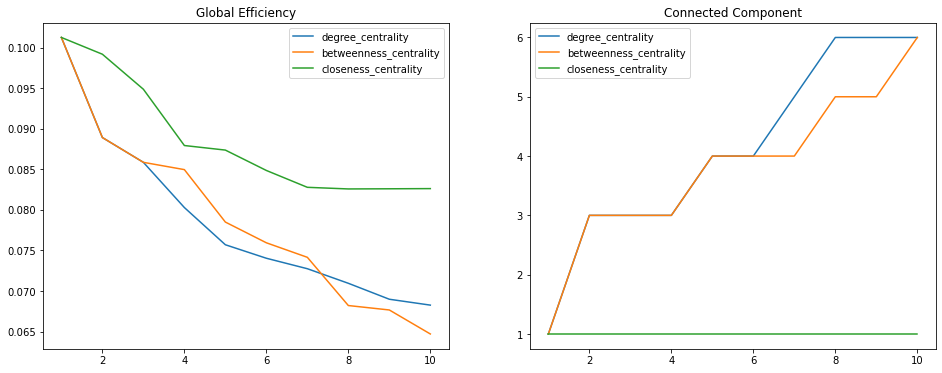

In [18]:
import matplotlib.pyplot as plt
plt.subplots(1,2, figsize=(16, 6))
for centrality in top_10_centrality.columns.tolist():
    plt.subplot(121)
    plt.title("Global Efficiency")
    plt.plot(range(1, 11), Global_Efficiency_Remove(G, top_10_centrality[centrality], 10), label=centrality)
    plt.subplot(122)
    plt.title("Connected Component")
    plt.plot(range(1, 11), Largest_Connected_Component_Remove(G, top_10_centrality[centrality], 10), label=centrality)
plt.subplot(121)
plt.legend(loc="best")
plt.subplot(122)
plt.legend(loc="best")

### B) Sequential Removal

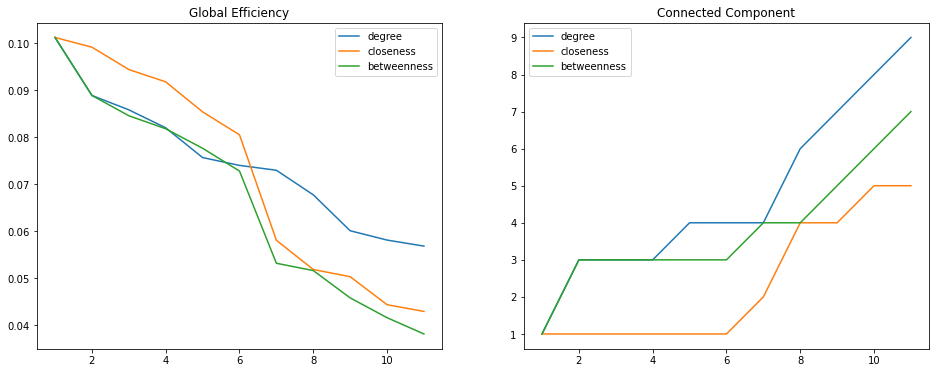

In [19]:
def select_highest(G, centrality_name):
    centrality = pd.DataFrame()
    centrality["node"] = list(G.nodes)
    if centrality_name == "closeness":
        centrality["centrality"] = nx.closeness_centrality(G).values()
    elif centrality_name == "betweenness":
        centrality["centrality"] = nx.betweenness_centrality(G, normalized=False).values()
    else:
        centrality["centrality"] = nx.degree_centrality(G).values()
    centrality = centrality.sort_values(["centrality"], ascending=False)
    centrality.reset_index(inplace=True, drop=True)
    return centrality["node"][0]

    
def sequential_removal(G, num_of_node_to_remove, centrality_name):
    G_SR = G.copy()
    GE = []
    NCC = []
    GE.append(Global_Efficiency(G_SR))
    NCC.append(nx.number_connected_components(G_SR))
    for i in range(num_of_node_to_remove):
        node_to_remove = select_highest(G_SR, centrality_name)
        G_SR.remove_node(node_to_remove)
        GE.append(Global_Efficiency(G_SR))
        NCC.append(nx.number_connected_components(G_SR))
    return GE, NCC

plt.subplots(1,2, figsize=(16, 6))
for centrality_name in ["degree", "closeness", "betweenness"]:
    GE, NCC = sequential_removal(G, 10, centrality_name)
    plt.subplot(121)
    plt.title("Global Efficiency")
    plt.plot(range(1, 12), GE, label=centrality_name)
    plt.subplot(122)
    plt.title("Connected Component")
    plt.plot(range(1, 12), NCC, label=centrality_name)
plt.subplot(121)
plt.legend(loc="best")
plt.subplot(122)
plt.legend(loc="best")

# Flows: weighted network

In this section, you will include passengers into the underground, and assess whether different measures need to be used when flows are considered. The network to use in this section is the weighted network given to you in the coursework, where the flows of passengers were assigned to the links between stations.

## Centrality Measure

Consider the centrality measure derived in I.- indicating the most relevant stations for assessing the vulnerability of the underground. What would you need to do to adjust this measure for a weighted network? Recompute the ranking of the 10 most important nodes according to this adjusted measure. Do you find the same ones as in I.1?


The normalization of degree centrality is to facilitate comparison between different networks, and for weighted networks, different weighted networks are often not comparable, because the characteristics in weighted network A are not necessarily applicable to weighted network B. Thus we only consider the betweenness centrality and closeness centrality here.

In [20]:
# We first detect the row such that the flows is 0, we need to assign 1 to them
df = nx.to_pandas_edgelist(G)
df[df.flows==0]

,source,target,flows,line_name,length
224,Wandsworth Road,Battersea Park,0,London Overground,1168.489261
398,Kennington,Nine Elms,0,Northern,2030.621843
426,Battersea Power Station,Nine Elms,0,Northern,1073.465362


In [21]:
G.edges['Wandsworth Road','Battersea Park']['flows'] = 1
G.edges['Kennington','Nine Elms']['flows'] = 1
G.edges['Battersea Power Station','Nine Elms']['flows'] = 1

In [22]:
# The greater weight, the less distance
inv_weights={(e1, e2):round(1./weight,7) for e1, e2, weight in G.edges(data='flows')}
nx.set_edge_attributes(G, inv_weights, 'v_weights')
list(G.edges(data = True))[0:2]

[('Wembley Park',
  'Kingsbury',
  {'length': 2916.7715580506483,
   'line_name': 'Jubilee',
   'flows': 12356,
   'v_weights': 8.09e-05}),
 ('Wembley Park',
  'Neasden',
  {'length': 2353.1659381957816,
   'line_name': 'Jubilee',
   'flows': 6744,
   'v_weights': 0.0001483})]

Now we compute the weighted betweenness centrality, what we need to do is transforming the previous one into `centrality["betweenness_centrality"] = nx.betweenness_centrality(G, weight='v_weights',normalized=False).values()`

In [25]:
centrality = pd.DataFrame()
top_10_centrality = pd.DataFrame()
centrality["node"] = list(G.nodes)
centrality["betweenness_centrality"] = nx.betweenness_centrality(G).values()
# centrality["length_weighted_betweenness_centrality"] = nx.betweenness_centrality(G, weight='length',normalized=False).values()
centrality["weighted_betweenness_centrality"] = nx.betweenness_centrality(G, weight='v_weights',normalized=False).values()

betweenness_centrality_head_10 = centrality.sort_values(["betweenness_centrality"], ascending=False)
betweenness_centrality_head_10.reset_index(inplace=True, drop=True)
top_10_centrality["betweenness_centrality"] = betweenness_centrality_head_10.head(10)["node"]

betweenness_centrality_head_10 = centrality.sort_values(["weighted_betweenness_centrality"], ascending=False)
betweenness_centrality_head_10.reset_index(inplace=True, drop=True)
top_10_centrality["weighted_betweenness_centrality"] = betweenness_centrality_head_10.head(10)["node"]

# betweenness_centrality_head_10 = centrality.sort_values(["length_weighted_betweenness_centrality"], ascending=False)
# betweenness_centrality_head_10.reset_index(inplace=True, drop=True)
# top_10_centrality["length_weighted_betweenness_centrality"] = betweenness_centrality_head_10.head(10)["node"]

top_10_centrality

,betweenness_centrality,weighted_betweenness_centrality
0,Stratford,Green Park
1,Bank and Monument,Bank and Monument
2,Liverpool Street,Waterloo
3,King's Cross St. Pancras,Westminster
4,Waterloo,Liverpool Street
5,Green Park,Stratford
6,Euston,Bond Street
7,Westminster,Euston
8,Baker Street,Oxford Circus
9,Finchley Road,Warren Street


As for closeness centrality, we add the distance as what we did in dealing with betweenness centrality.

In [26]:
centrality["closeness_centrality"] = nx.closeness_centrality(G).values()
closeness_centrality_head_10 = centrality.sort_values(["closeness_centrality"], ascending=False)
closeness_centrality_head_10.reset_index(inplace=True, drop=True)
top_10_centrality["closeness_centrality"] = closeness_centrality_head_10.head(10)["node"]

centrality["weighted_closeness_centrality"] = nx.closeness_centrality(G, distance='v_weights').values()
weighted_closeness_centrality_head_10 = centrality.sort_values(["weighted_closeness_centrality"], ascending=False)
weighted_closeness_centrality_head_10.reset_index(inplace=True, drop=True)
top_10_centrality["weighted_closeness_centrality"] = weighted_closeness_centrality_head_10.head(10)["node"]

top_10_centrality

,betweenness_centrality,weighted_betweenness_centrality,closeness_centrality,weighted_closeness_centrality
0,Stratford,Green Park,Green Park,Green Park
1,Bank and Monument,Bank and Monument,Bank and Monument,Westminster
2,Liverpool Street,Waterloo,King's Cross St. Pancras,Waterloo
3,King's Cross St. Pancras,Westminster,Westminster,Bank and Monument
4,Waterloo,Liverpool Street,Waterloo,Oxford Circus
5,Green Park,Stratford,Oxford Circus,Bond Street
6,Euston,Bond Street,Bond Street,Victoria
7,Westminster,Euston,Farringdon,Liverpool Street
8,Baker Street,Oxford Circus,Angel,Warren Street
9,Finchley Road,Warren Street,Moorgate,Moorgate


In [27]:
print(top_10_centrality.to_latex(index=False))

\begin{tabular}{llll}
\toprule
  betweenness\_centrality & weighted\_betweenness\_centrality &     closeness\_centrality & weighted\_closeness\_centrality \\
\midrule
               Stratford &                      Green Park &               Green Park &                    Green Park \\
       Bank and Monument &               Bank and Monument &        Bank and Monument &                   Westminster \\
        Liverpool Street &                        Waterloo & King's Cross St. Pancras &                      Waterloo \\
King's Cross St. Pancras &                     Westminster &              Westminster &             Bank and Monument \\
                Waterloo &                Liverpool Street &                 Waterloo &                 Oxford Circus \\
              Green Park &                       Stratford &            Oxford Circus &                   Bond Street \\
                  Euston &                     Bond Street &              Bond Street &                    

## Impact measures

Now consider the measure for assessing the impact of node removal. Would you adjust the measure for a weighted network? If yes, how? Propose a different measure that would be better at assessing the impact of closing a station taking into consideration the passengers.

In [28]:
def Global_Efficiency_Weighted(G):
    n = len(G)
    if n * (n - 1) != 0:
        lengths = nx.shortest_path_length(G, weight='v_weights')
        g_eff = 0
        for node, targets in lengths:
            for target, distance in targets.items():
                if distance > 0:
                    g_eff += 1 / distance
        return g_eff / (n * (n - 1))
    else:
        return 0

Global_Efficiency_Weighted(G)

2649.0571470348873

In [29]:
def Weighted_Global_Efficiency_Remove(G, top_10, removal_num=None):
    G_GE = G.copy()
    NGE = []
    if removal_num:
        nodelist_to_remove = [list(top_10)[i] for i in range(removal_num)]
        for node in nodelist_to_remove:
            NGE.append(Global_Efficiency_Weighted(G_GE))
            G_GE.remove_node(node)
    return NGE

The Largest Connected Component remains the same.

### Non-Sequential Removal

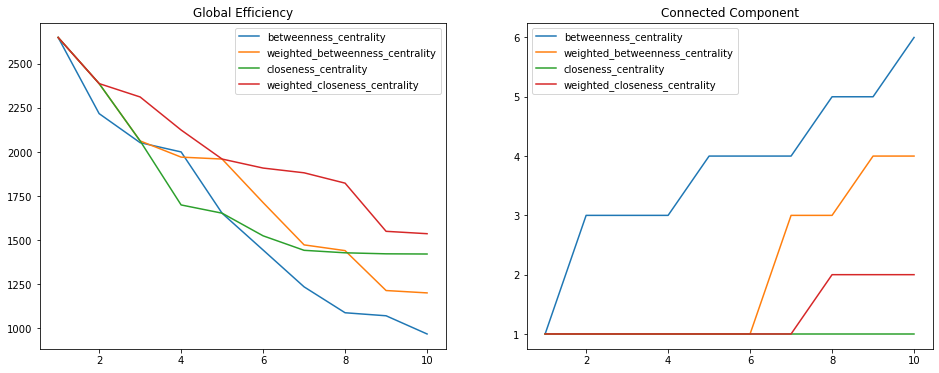

In [30]:
plt.subplots(1,2, figsize=(16, 6))
for centrality in top_10_centrality.columns.tolist():
    plt.subplot(121)
    plt.title("Global Efficiency")
    plt.plot(range(1, 11), Weighted_Global_Efficiency_Remove(G, top_10_centrality[centrality], 10), label=centrality)
    plt.subplot(122)
    plt.title("Connected Component")
    plt.plot(range(1, 11), Largest_Connected_Component_Remove(G, top_10_centrality[centrality], 10), label=centrality)
plt.subplot(121)
plt.legend(loc="best")
plt.subplot(122)
plt.legend(loc="best")

### Sequential Removal

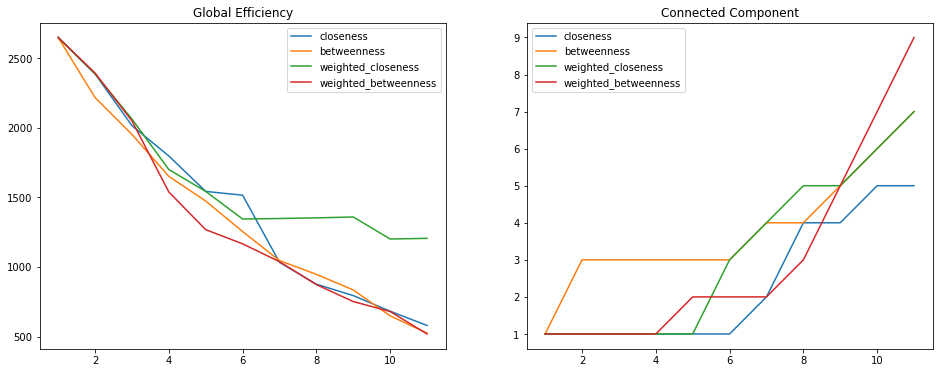

In [31]:
def select_highest(G, centrality_name):
    centrality = pd.DataFrame()
    centrality["node"] = list(G.nodes)
    if centrality_name == "closeness":
        centrality["centrality"] = nx.closeness_centrality(G).values()
    elif centrality_name == "betweenness":
        centrality["centrality"] = nx.betweenness_centrality(G, normalized=False).values()
    elif centrality_name == "weighted_closeness":
        centrality["centrality"] = nx.closeness_centrality(G, distance='v_weights').values()
    elif centrality_name == "weighted_betweenness":
        centrality["centrality"] = nx.betweenness_centrality(G, weight='length',normalized=False).values()
        
    centrality = centrality.sort_values(["centrality"], ascending=False)
    centrality.reset_index(inplace=True, drop=True)
    return centrality["node"][0]

    
def sequential_removal(G, num_of_node_to_remove, centrality_name):
    G_SR = G.copy()
    GE = []
    NCC = []
    GE.append(Global_Efficiency_Weighted(G_SR))
    NCC.append(nx.number_connected_components(G_SR))
    for i in range(num_of_node_to_remove):
        node_to_remove = select_highest(G_SR, centrality_name)
        G_SR.remove_node(node_to_remove)
        GE.append(Global_Efficiency_Weighted(G_SR))
        NCC.append(nx.number_connected_components(G_SR))
    return GE, NCC

plt.subplots(1,2, figsize=(16, 6))
for centrality_name in ["closeness", "betweenness", "weighted_closeness", "weighted_betweenness"]:
    GE, NCC = sequential_removal(G, 10, centrality_name)
    plt.subplot(121)
    plt.title("Global Efficiency")
    plt.plot(range(1, 12), GE, label=centrality_name)
    plt.subplot(122)
    plt.title("Connected Component")
    plt.plot(range(1, 12), NCC, label=centrality_name)
plt.subplot(121)
plt.legend(loc="best")
plt.subplot(122)
plt.legend(loc="best")

# Citation

> @Inbook{Sharma2013,
author="Sharma, Deepak
and Surolia, Avadhesha",
editor="Dubitzky, Werner
and Wolkenhauer, Olaf
and Cho, Kwang-Hyun
and Yokota, Hiroki",
title="Degree Centrality",
bookTitle="Encyclopedia of Systems Biology",
year="2013",
publisher="Springer New York",
address="New York, NY",
pages="558--558",
isbn="978-1-4419-9863-7",
doi="10.1007/978-1-4419-9863-7_935",
url="https://doi.org/10.1007/978-1-4419-9863-7_935"
}

> Latora, Vito, and Massimo Marchiori. “Efficient behavior of small-world networks.” Physical Review Letters 87.19 (2001): 198701. <https://doi.org/10.1103/PhysRevLett.87.198701>